# Imports, Helper Functions, and Loading

In [16]:

import numpy as np
import matplotlib.pyplot as plt
import lsst.daf.butler as dafButler
import functools
import operator
import pandas as pd

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

plt.set_loglevel('WARNING')

from lsst.analysis.ap import apdb

In [3]:
## Grouping tracts based on location on the sky
group1 = [3384, 3385]
group2 = [2261, 2262, 2494, 2495]
group3 = [9880, 9881, 9638]
group4 = [3533, 3534, 3345, 3346]
group5 = [7683, 7684, 7445, 7446]
group6 = [9590, 9591, 9347, 9348]
group7 = [9812, 9813]
group8 = [7149, 6914, 6915]

groups = [group1, group2, group3, group4, group5, group6, group7, group8]

In [4]:
def getUniqueVisits(collections, tracts):
    """Get the unique visits from a given tract."""
    visitList = []
    tracts = ','.join(str(tract) for tract in tracts)
    for d in sorted(registry.queryDatasets(datasetType="goodSeeingDiff_diaSrcTable", collections=collections, where=f"skymap='ops_rehersal_prep_2k_v1' AND tract IN ({tracts})")): 
        visitList.append(d.dataId['visit'])
    uniqueVisits = list(set(visitList))
    return uniqueVisits

## Loading Data


In [7]:
repo = '/repo/embargo'

instrument = 'LSSTComCamSim'
collections = 'u/elhoward/DM-43098/LSSTComCamSim'
skymap = 'ops_rehersal_prep_2k_v1'

butler = dafButler.Butler(repo, instrument=instrument)
registry = butler.registry

skymap = butler.get("skyMap", collections=collections, skymap="ops_rehersal_prep_2k_v1")

INFO:botocore.credentials:Found credentials in shared credentials file: /sdf/home/n/ncaplar/.lsst/aws-credentials.ini


In [8]:
visitListByGroup = []

for group in groups:
    visits = getUniqueVisits(collections, group)
    visitListByGroup.append(visits)
    print("There are "+str(len(visits))+f" visits in tracts {group}")


There are 119 visits in tracts [3384, 3385]
There are 352 visits in tracts [2261, 2262, 2494, 2495]
There are 298 visits in tracts [9880, 9881, 9638]
There are 295 visits in tracts [3533, 3534, 3345, 3346]
There are 354 visits in tracts [7683, 7684, 7445, 7446]
There are 238 visits in tracts [9590, 9591, 9347, 9348]
There are 356 visits in tracts [9812, 9813]
There are 299 visits in tracts [7149, 6914, 6915]


In [9]:
# nImage1 = butler.get('goodSeeingCoadd_nImage', tract=9880, collections = collections,  band='r', patch = 100, skymap='ops_rehersal_prep_2k_v1')

In [10]:
tract_id = 3533

tractInfo = skymap.generateTract(tract_id)
tractInfo_vertices = tractInfo.vertex_list

In [11]:
vertices_as_deg = []
for i in range(0,4):
   vertices_as_deg.append([tractInfo_vertices[i].getRa().asDegrees(), tractInfo_vertices[i].getDec().asDegrees()])
vertices_as_deg = np.array(vertices_as_deg)

ra_min = np.min(vertices_as_deg[:,0])
ra_max = np.max(vertices_as_deg[:,0])
dec_min = np.min(vertices_as_deg[:,1])
dec_max = np.max(vertices_as_deg[:,1])

In [18]:
# to look at the columns avaliable
# Assuming 'apdbQuery.connection' is your database connection object
with apdbQuery.connection as connection:
    # Query to fetch all column names from the DiaObject table
    query_columns = '''
    SELECT column_name
    FROM information_schema.columns
    WHERE table_schema = 'elhoward_dm43098_lsstcomcamsim_appipe' AND table_name = 'DiaSource';
    '''
    df_columns = pd.read_sql_query(query_columns, connection)
    print("Available columns:", df_columns['column_name'].tolist())

Available columns: ['diaSourceId', 'ccdVisitId', 'diaObjectId', 'ssObjectId', 'parentDiaSourceId', 'ssObjectReassocTime', 'midpointMjdTai', 'ra', 'raErr', 'dec', 'decErr', 'ra_dec_Cov', 'x', 'xErr', 'y', 'yErr', 'x_y_Cov', 'apFlux', 'apFluxErr', 'snr', 'psfFlux', 'psfFluxErr', 'psfRa', 'psfRaErr', 'psfDec', 'psfDecErr', 'psfFlux_psfRa_Cov', 'psfFlux_psfDec_Cov', 'psfRa_psfDec_Cov', 'psfLnL', 'psfChi2', 'psfNdata', 'trailFlux', 'trailFluxErr', 'trailRa', 'trailRaErr', 'trailDec', 'trailDecErr', 'trailLength', 'trailLengthErr', 'trailAngle', 'trailAngleErr', 'trailFlux_trailRa_Cov', 'trailFlux_trailDec_Cov', 'trailFlux_trailLength_Cov', 'trailFlux_trailAngle_Cov', 'trailRa_trailDec_Cov', 'trailRa_trailLength_Cov', 'trailRa_trailAngle_Cov', 'trailDec_trailLength_Cov', 'trailDec_trailAngle_Cov', 'trailLength_trailAngle_Cov', 'trailLnL', 'trailChi2', 'trailNdata', 'dipoleMeanFlux', 'dipoleMeanFluxErr', 'dipoleFluxDiff', 'dipoleFluxDiffErr', 'dipoleRa', 'dipoleRaErr', 'dipoleDec', 'dipoleDec

In [19]:
from lsst.daf.butler import DataCoordinate
from lsst.obs.lsst import RubinDimensionPacker

packer = RubinDimensionPacker(DataCoordinate.standardize({"instrument": 'LATISS'}, universe=butler.dimensions), config=RubinDimensionPacker.ConfigClass(), is_exposure=False)
packer.pack({"instrument": 'LATISS', "detector": 0, "visit": 7024040200361})
dataId = DataCoordinate.standardize({"instrument": 'LATISS', "detector": 0, "visit": 7024040200361}, universe=butler.dimensions)
print(dataId)
ccdVisitId = packer.pack(dataId)
packer.unpack(ccdVisitId)

{instrument: 'LATISS', detector: 0, visit: 7024040200361}


{instrument: 'LATISS', detector: 0, visit: 7024040200361}

In [20]:

schema = f'elhoward_dm43098_lsstcomcamsim_appipe'

apdbQuery = apdb.ApdbPostgresQuery(butler=butler, instrument=instrument, namespace=schema)

In [21]:
# to look at the columns avaliable
# Assuming 'apdbQuery.connection' is your database connection object
with apdbQuery.connection as connection:
    # Query to fetch all column names from the DiaObject table
    query_columns = '''
    SELECT column_name
    FROM information_schema.columns
    WHERE table_schema = 'elhoward_dm43098_lsstcomcamsim_appipe' AND table_name = 'DiaSource';
    '''
    df_columns = pd.read_sql_query(query_columns, connection)
    print("Available columns:", df_columns['column_name'].tolist())

Available columns: ['diaSourceId', 'ccdVisitId', 'diaObjectId', 'ssObjectId', 'parentDiaSourceId', 'ssObjectReassocTime', 'midpointMjdTai', 'ra', 'raErr', 'dec', 'decErr', 'ra_dec_Cov', 'x', 'xErr', 'y', 'yErr', 'x_y_Cov', 'apFlux', 'apFluxErr', 'snr', 'psfFlux', 'psfFluxErr', 'psfRa', 'psfRaErr', 'psfDec', 'psfDecErr', 'psfFlux_psfRa_Cov', 'psfFlux_psfDec_Cov', 'psfRa_psfDec_Cov', 'psfLnL', 'psfChi2', 'psfNdata', 'trailFlux', 'trailFluxErr', 'trailRa', 'trailRaErr', 'trailDec', 'trailDecErr', 'trailLength', 'trailLengthErr', 'trailAngle', 'trailAngleErr', 'trailFlux_trailRa_Cov', 'trailFlux_trailDec_Cov', 'trailFlux_trailLength_Cov', 'trailFlux_trailAngle_Cov', 'trailRa_trailDec_Cov', 'trailRa_trailLength_Cov', 'trailRa_trailAngle_Cov', 'trailDec_trailLength_Cov', 'trailDec_trailAngle_Cov', 'trailLength_trailAngle_Cov', 'trailLnL', 'trailChi2', 'trailNdata', 'dipoleMeanFlux', 'dipoleMeanFluxErr', 'dipoleFluxDiff', 'dipoleFluxDiffErr', 'dipoleRa', 'dipoleRaErr', 'dipoleDec', 'dipoleDec

In [22]:
# let us say that we want to 



with apdbQuery.connection as connection:
    pp_source_table = pd.read_sql_query(f'SELECT "diaSourceId", "diaObjectId", "ra", "dec", "midpointMjdTai", "ccdVisitId", \
                                 "psfFlux", "psfFluxErr", \
                                 "scienceFlux", "scienceFluxErr", "snr", \
                                 "flags", "band", "time_processed", "time_withdrawn"  \
                                 FROM "{schema}"."DiaSource" \
                                 WHERE "ra" BETWEEN {ra_min} AND {ra_max} \
                                 AND "dec" BETWEEN {dec_min} AND {dec_max} \
                                 LIMIT 3000000; ''', connection)
    
# pp_object_table = apdbQuery.load_objects(limit=1e6)     

with apdbQuery.connection as connection:
    pp_object_table = pd.read_sql_query(f'''
    SELECT "diaObjectId", "ra", "dec", "flags", "nDiaSources", "validityStart", "validityEnd", "lastNonForcedSource"
    FROM "{schema}"."DiaObject"
    WHERE "ra" BETWEEN {ra_min} AND {ra_max}
    AND "dec" BETWEEN {dec_min} AND {dec_max}
    AND "validityEnd" IS NULL
    LIMIT 2000000;
    ''', connection)

In [23]:
assert (len(pp_source_table)) < 3000000
assert (len(pp_object_table)) < 2000000

In [24]:
src_single_visit_det = pp_source_table[pp_source_table['ccdVisitId']==730865926146]
print(packer.unpack(730865926146))
src_single_visit_det

{instrument: 'LATISS', detector: 2, visit: 7024040300256}


,diaSourceId,diaObjectId,ra,dec,midpointMjdTai,ccdVisitId,psfFlux,psfFluxErr,scienceFlux,scienceFluxErr,snr,flags,band,time_processed,time_withdrawn
19090,3065473877497872440,3065473877497872440,224.525193,-39.639212,60404.126433,730865926146,3258.519877,620.074888,262390.114025,608.817151,5.370881,8388608,i,2024-04-21 01:28:55.958063,None
19091,3065473877497872441,3065473877497872441,224.521171,-39.678085,60404.126433,730865926146,-3432.358386,407.379717,7467.589210,397.998721,8.462321,9605120,i,2024-04-21 01:28:55.958063,None
19092,3065473877497872386,3065473877497872386,224.505329,-39.641970,60404.126433,730865926146,2162.317403,406.179898,10555.611117,397.591311,5.266704,14319616,i,2024-04-21 01:28:55.958063,None
19093,3065473877497872389,3065473877497872389,224.493197,-39.766515,60404.126433,730865926146,3361.067656,586.634446,177133.461720,577.815220,5.604084,0,i,2024-04-21 01:28:55.958063,None
19094,3065473877497872390,3065473877497872390,224.511912,-39.597511,60404.126433,730865926146,3996.160469,409.207901,10989.235125,401.402493,9.663493,0,i,2024-04-21 01:28:55.958063,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19685,3065473877497873212,3065473877497873212,224.790139,-39.660608,60404.126433,730865926146,4130.761585,649.912636,273895.217350,641.142103,6.067639,0,i,2024-04-21 01:28:55.958063,None
19686,3065473877497873213,3065473877497873213,224.797034,-39.599655,60404.126433,730865926146,9163.254709,418.963647,17842.156617,415.850911,21.739445,9605120,i,2024-04-21 01:28:55.958063,None
19687,3065473877497873214,3065473877497873214,224.784525,-39.704591,60404.126433,730865926146,2033.548077,406.053691,12636.030202,400.270945,5.263713,9601024,i,2024-04-21 01:28:55.958063,None
19688,3065473877497873215,3065473877497873215,224.787439,-39.684022,60404.126433,730865926146,-2362.344956,400.258752,2046.339082,394.221112,6.532410,9605120,i,2024-04-21 01:28:55.958063,None


In [ ]:
midpointMjdTai = src_single_visit_det['midpointMjdTai'].values[0]

In [195]:
# this is to figure out which healpy corresponds to the observations
import healpy as hp
ra_cent = np.median(src_single_visit_det['ra'])
dec_cent = np.median(src_single_visit_det['dec'])
dec_cent

vec = hp.ang2vec(np.deg2rad((np.abs(dec_cent) + 90)), np.deg2rad(ra_cent) )
print(vec)


ipix_disc = hp.query_disc(nside=32, vec=vec, radius=np.radians(1) )
# ipix_disc


path_to_tru_cat = '/sdf/data/rubin/shared/ops-rehearsals/ops-rehearsal-3/imSim_catalogs/skyCatalogs/'
healpix_id = ipix_disc[0]

# find which ones are variable
df_single_ps = pd.read_parquet(path_to_tru_cat+'pointsource_'+str(healpix_id)+'.parquet')
df_single_sso = pd.read_parquet(path_to_tru_cat+'sso_'+str(healpix_id)+'.parquet')
df_single_gal = pd.read_parquet(path_to_tru_cat+'galaxy_'+str(healpix_id)+'.parquet')
df_single_gal['ra'] = df_single_gal['ra'] + 360

df_single_ps_var = df_single_ps[df_single_ps['is_variable']==True]

ra_min = np.min(src_single_visit_det['ra'])
ra_max = np.max(src_single_visit_det['ra'])
dec_min = np.min(src_single_visit_det['dec'])
dec_max = np.max(src_single_visit_det['dec'])


# cut to the area that overlaps
df_single_ps_var_zoom = df_single_ps_var[(df_single_ps_var['ra']<ra_max) & (df_single_ps_var['ra']>ra_min) &\
    (df_single_ps_var['dec']<dec_max) & (df_single_ps_var['dec']>dec_min) ]
df_single_gal_zoom = df_single_gal[(df_single_gal['ra']<ra_max) & (df_single_gal['ra']>ra_min) &\
    (df_single_gal['dec']<dec_max) & (df_single_gal['dec']>dec_min) ]


[-0.54757694 -0.54086238 -0.63845703]


In [196]:
sso_ids = np.unique(df_single_sso['id'])

In [197]:
list_of_sso_single_exp = []
for i in range(len(sso_ids)):
    df_single_sso_single_id = df_single_sso[df_single_sso['id']==sso_ids[i]]
    ra_fit = np.polyfit(df_single_sso_single_id['mjd'],df_single_sso_single_id['ra'], deg = 2)
    dec_fit = np.polyfit(df_single_sso_single_id['mjd'],df_single_sso_single_id['dec'], deg = 2)
    ra_poly = np.poly1d(ra_fit)
    dec_poly = np.poly1d(dec_fit)

    # Predicting values
    predicted_ra = ra_poly(midpointMjdTai)
    predicted_dec = dec_poly(midpointMjdTai)
    list_of_sso_single_exp.append([sso_ids[i], predicted_ra, predicted_dec])
    
array_of_sso_single_exp = np.array(list_of_sso_single_exp)
array_of_sso_single_exp[:,1] = array_of_sso_single_exp[:,1].astype(float)
array_of_sso_single_exp[:,2] = array_of_sso_single_exp[:,2].astype(float)

In [198]:
df_single_sso_zoom = array_of_sso_single_exp[(array_of_sso_single_exp[:,1].astype(float)<ra_max) & (array_of_sso_single_exp[:,1].astype(float)>ra_min) &\
    (array_of_sso_single_exp[:,2].astype(float)<dec_max) & (array_of_sso_single_exp[:,2].astype(float)>dec_min) ]

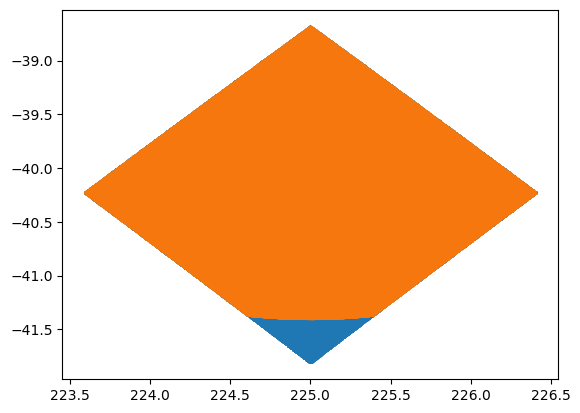

In [199]:
plt.scatter(df_single_ps['ra'], df_single_ps['dec'], s=1, alpha=1, label = 'diaSources')
plt.scatter(df_single_gal['ra'], df_single_gal['dec'], s=1, alpha=0.1, label = 'galaxies')

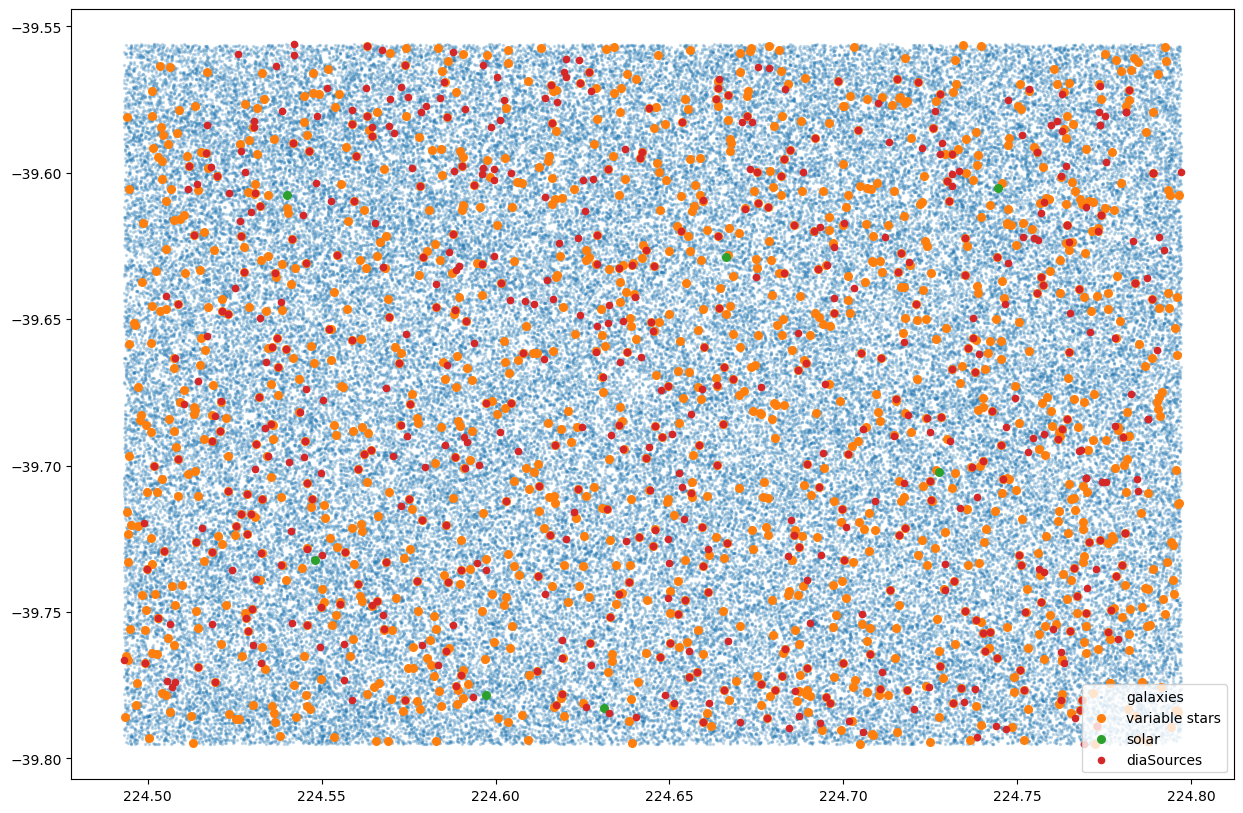

In [202]:
plt.figure(figsize=(15,10))


plt.scatter(df_single_gal_zoom['ra'], df_single_gal_zoom['dec'], s=2, alpha=0.21, label = 'galaxies')

plt.scatter(df_single_ps_var_zoom['ra'], df_single_ps_var_zoom['dec'], s=30, alpha=1, label = 'variable stars')

plt.scatter(df_single_sso_zoom[:,1].astype(float), df_single_sso_zoom[:,2].astype(float), s=30, alpha=1, label = 'solar')
plt.scatter(src_single_visit_det['ra'], src_single_visit_det['dec'], s=20, alpha=1, label = 'diaSources')
plt.legend()

In [ ]:
# function that shows everything near by
# and then butler

In [41]:
# Determine which dataset types exist in the collection
for datasetType in registry.queryDatasetTypes():
    if registry.queryDatasets(datasetType, collections=collections).any(execute=False, exact=False):
        # Limit search results to the data products
        if ('_config' not in datasetType.name) and ('_log' not in datasetType.name) and ('_metadata' not in datasetType.name) and ('_resource_usage' not in datasetType.name):
            print(datasetType)

DatasetType('packages', {}, Packages)
DatasetType('icSrc_schema', {}, SourceCatalog)
DatasetType('src_schema', {}, SourceCatalog)
DatasetType('icSrc', {band, instrument, day_obs, detector, physical_filter, visit}, SourceCatalog)
DatasetType('icExpBackground', {band, instrument, day_obs, detector, physical_filter, visit}, Background)
DatasetType('icExp', {band, instrument, day_obs, detector, physical_filter, visit}, ExposureF)
DatasetType('postISRCCD', {band, instrument, day_obs, detector, group, physical_filter, exposure}, Exposure)
DatasetType('src', {band, instrument, day_obs, detector, physical_filter, visit}, SourceCatalog)
DatasetType('calexpBackground', {band, instrument, day_obs, detector, physical_filter, visit}, Background)
DatasetType('calexp', {band, instrument, day_obs, detector, physical_filter, visit}, ExposureF)
DatasetType('srcMatchFull', {band, instrument, day_obs, detector, physical_filter, visit}, Catalog)
DatasetType('srcMatch', {band, instrument, day_obs, detector,

In [101]:
repo = '/repo/embargo'
butler = dafButler.Butler(repo)
instrument = 'LSSTComCamSim'
schema = f'elhoward_dm43098_lsstcomcamsim_appipe'

apdbQuery = apdb.ApdbPostgresQuery(butler=butler, instrument=instrument, namespace=schema)

with apdbQuery.connection as connection:
    pp_source_table = pd.read_sql_query(f'SELECT "diaSourceId", "diaObjectId", "ra", "dec", "midpointMjdTai", \
                                 "psfFlux", "psfFluxErr", \
                                 "scienceFlux", "scienceFluxErr", "snr", \
                                 "flags", "band", "time_processed", "time_withdrawn"  \
                                 FROM "{schema}"."DiaSource" \
                                 WHERE "ra" BETWEEN {ra_min} AND {ra_max} \
                                 AND "dec" BETWEEN {dec_min} AND {dec_max} \
                                 LIMIT 3000000; ''', connection)
    
# pp_object_table = apdbQuery.load_objects(limit=1e6)     

with apdbQuery.connection as connection:
    pp_object_table = pd.read_sql_query(f'''
    SELECT "diaObjectId", "ra", "dec", "flags", "nDiaSources", "validityStart", "validityEnd", "lastNonForcedSource"
    FROM "{schema}"."DiaObject"
    WHERE "ra" BETWEEN {ra_min} AND {ra_max}
    AND "dec" BETWEEN {dec_min} AND {dec_max}
    AND "validityEnd" IS NULL
    LIMIT 2000000;
    ''', connection)

In [35]:
visitListByGroup = []

for group in groups:
    visits = getUniqueVisits(collections, group)
    visitListByGroup.append(visits)
    print("There are "+str(len(visits))+f"visits in tracts {group}")

NoDefaultCollectionError: No collections, and no registry default collections.

In [34]:
bbox = butler.get('calexp.bbox', visit=visitListByGroup[0][0], detector=0)
PIXEL_SCALE = butler.get('calexp.wcs', visit=visitListByGroup[0][0], detector=0).getPixelScale().asDegrees()
APPROX_CCD_AREA =  PIXEL_SCALE*PIXEL_SCALE*bbox.getArea()
N_CCD = 9
APPROX_VISIT_AREA = APPROX_CCD_AREA * N_CCD
print(f"ComCam visit area is {APPROX_VISIT_AREA} square degrees")

IndexError: list index out of range